# Data in the notebook got from anthropologist [Stanislav Drobyshevsky](https://vk.com/id15342645)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
from utils import init_param, model  # , compute_cost, init_adam, adam_optimizer, forward_prop, backward_prop

sns.set_style("whitegrid")

In [2]:
data = pd.read_csv("headbrain.csv")
X = data.iloc[:, 0].to_numpy().reshape(-1, 1)
y = data.iloc[:, 1].to_numpy().reshape(-1, 1)

In [3]:
def compute_cost(theta, X, y):
    m = X.shape[0]

    predict = X.dot(theta)
    cost = 1/(2*m) * np.sum(np.square(predict - y))
    return cost


def gradient_descent(X, y, theta, lr=0.01, iters=10):
    m = X.shape[0]
    cost_history = np.zeros(iters)
    theta_history = np.zeros((iters, 2))
    for i in range(iters):
        predict = np.dot(X, theta)
        theta = theta - (1/m) * lr * (X.T.dot((predict - y)))  # 1/m * lr * X.T.dot(predict - y)
#         import pdb; pdb.set_trace()
        theta_history[i, :] = theta.T
        cost_history[i] = compute_cost(theta, X, y)
#         print(cost_history[i])
    return theta, cost_history, theta_history
        
# def gradient_descent(X, y, theta, lr=0.01, iters=10):
#     m = X.shape[0]
#     cost_history = np.zeros(iters)
#     theta_history = np.zeros((iters, 2))
#     for i in range(iters):
#         predict = X.dot(theta)
#         theta -= (1/m) * lr * (X.T.dot((predict - y)))  # 1/m * lr * X.T.dot(predict - y)
# #         import pdb; pdb.set_trace()
#         theta_history[i, :] = theta.T
#         cost_history[i] = compute_cost(theta, X, y)

    return theta, cost_history, theta_history


# X = np.concatenate((np.ones((m, 1)), X.to_numpy().reshape(-1, 1)), axis=1)
# y = y.to_numpy().reshape((-1, 1))
theta = np.random.randn(X.shape[1], 1)  # init_param(*X.shape)
iters = 1000
# X_b = np.c_(np.ones((X.s)))
theta, cost_history, theta_history = gradient_descent(X, y, theta, iters=iters)

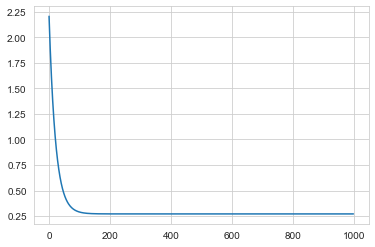

In [4]:
plt.plot(range(iters), cost_history)
plt.show()
plt.close()